# Megaline Telecome Operator - Choosing the Best Option

## Introduction
Megaline, a major telecom provider, offers two prepaid mobile plans: Surf and Ultimate. Each plan comes with fixed allowances for calls, messages, and data, along with charges for usage exceeding those limits. As the company looks to optimize its marketing budget and increase profitability, the commercial department seeks to understand which plan generates more revenue and under what usage patterns.

This project performs a comprehensive analysis of customer behavior and monthly usage patterns across both plans. By merging and processing usage data (calls, messages, and internet) with customer demographics and plan pricing, we aim to derive data driven insights that can support business strategy.

## Objective
The primary objective of this project is to:
* Determine which prepaid plan (Surf or Ultimate) yields higher average monthly revenue per user (ARPU).
* Analyze usage patterns (calls, messages, data) to identify key revenue drivers.
* Explore user behavior across different regions and customer segments (e.g., age, city).
* Evaluate statistical differences in revenue generation using A/B testing techniques.
* Deliver actionable recommendations to guide advertising and plan promotion strategies.


## Hypotheses
To support data driven decision making, we evaluate the following statistical hypotheses:

### Hypothesis 1: Revenue Comparison Between Plans
H₀ (Null Hypothesis):
There is no significant difference in the average monthly revenue generated by users of the Surf and Ultimate plans.

H₁ (Alternative Hypothesis):
There is a significant difference in the average monthly revenue generated by users of the two plans.

### Hypothesis 2: Regional Revenue Comparison
H₀ (Null Hypothesis):
The average monthly revenue of users in the NY-NJ area is equal to that of users in other regions.

H₁ (Alternative Hypothesis):
The average monthly revenue of users in the NY-NJ area differs from that of users in other regions.

In [1]:
# Loading all the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import os
os.chdir("/Users/tathianicol/Desktop/Analyst/Megaline Telecom/dataset")

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
messages = pd.read_csv("megaline_messages.csv")
plans = pd.read_csv("megaline_plans.csv")
users = pd.read_csv("megaline_users.csv")

In [3]:
#Calls DataFrame 

# Check data types 
display("Calls DataFrame:")
display(calls.head())
display(calls.info())

# Check missing values
display(calls.isnull().sum())

# Check for duplicates 
display(calls.duplicated().sum())

# Convert data type 
calls['call_date'] = pd.to_datetime(calls['call_date'])

'Calls DataFrame:'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

id           0
user_id      0
call_date    0
duration     0
dtype: int64

np.int64(0)

The DataFrame seems relatively clean; there are no missing values or duplicates in the dataset. For the User DataFrame converting the 'call_date' column to the appropriate datetime format can be a valuable step for potential date-related analysis in the future. 

In [4]:
#Internet DataFarme

# Check data types 
display ("Internet DataFrame:")
display(internet.head())
display(internet.info())

# Check missing values
display(internet.isnull().sum())

# Check for duplicates 
display(internet.duplicated().sum())

# Convert data type
internet['session_date'] = pd.to_datetime(internet['session_date'])

'Internet DataFrame:'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

np.int64(0)

The 'Internet' DataFrame appears to be clean without any evident errors or missing values. Just like the two previous DataFrame, converting the 'session_date' column to the appropriate datetime format can be a valuable step for potential date-related analysis in the future.

In [5]:
#Messages DataFrame

# Check data types 
display("Messages DataFarme:")
display(messages.head())
display(messages.info())

# Check missing values
display(messages.isnull().sum())

#check for duplicates 
display(messages.duplicated().sum())

# Convert data type
messages['message_date'] = pd.to_datetime(messages['message_date'])

'Messages DataFarme:'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

id              0
user_id         0
message_date    0
dtype: int64

np.int64(0)

The 'Messages' DataFrame appears clean without evident errors, missing values, or duplicates. Just like the two previous DataFrame, converting the 'message' column to the appropriate datetime format can be a valuable step for potential date-related analysis in the future.

In [6]:
#Plans DataFrame

# Check data types 
display("Plans DataFarme:")
display(plans.head())
display(plans.info())

# Check missing values
display(plans.isnull().sum())

#check for duplicates 
display(plans.duplicated().sum())

'Plans DataFarme:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

np.int64(0)

The 'Plans' DataFrame appears clean and without evident errors or issues.
No corrections or modifications seem necessary based on the provided data checks.

In [7]:
#Users DataFrame

# Check data types 
display("Users DataFrame:")
display(users.head())
display(users.info())

# Check missing values
display(users.isnull().sum())

#check for duplicates 
display(users.duplicated().sum())

# convert date columns to datetime type
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

'Users DataFrame:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

np.int64(0)

The 'Users' DataFrame seems mostly clean, with no duplicates found. The primary correction is to convert the 'reg_date' and 'churn_date' columns to the appropriate datetime format for easier handling and analysis of date-related operations. The presence of many missing values in the 'churn_date' column suggests that most users are still using the service.

For each user, find:
The number of calls made and minutes used per month
The number of text messages sent per month
The volume of data per month
The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

#### Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
display("Summary Information about Plans DataFrame:")
display(plans.info())

'Summary Information about Plans DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


None

In [9]:
# Print a sample of data for plans
display("Sample Data from Plans DataFrame:")
display(plans.head())

'Sample Data from Plans DataFrame:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The Summary Information about Plans DataFrame have two non-null entries across all columns, suggesting no missing values for any plan-related attributes. And the Sample Data from Plans DataFrame display no missing values (nulls) in any of the columns, as all columns have two non-null entries. Moreover, the data types seem suitable for the attributes, considering the nature of the values in each column.

In [10]:
# Calculate and add columns that represent cost-benefit ratios. 
# provide insights into the value offered by each plan regarding the usage limits and cost.

# Cost-Benefit Ratios
plans['message_cost_ratio'] = plans['usd_monthly_pay'] / plans['messages_included']
plans['data_cost_ratio'] = plans['usd_monthly_pay'] / plans['mb_per_month_included']
plans['minute_cost_ratio'] = plans['usd_monthly_pay'] / plans['minutes_included']

# Displaying the DataFrame to check for the added columns
display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,message_cost_ratio,data_cost_ratio,minute_cost_ratio
0,50,15360,500,20,10,0.03,0.03,surf,0.40,0.001302,0.040000
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.07,0.002279,0.023333


Based of on the result of the calculation above, the ratio of the monthly cost to the number of messages included. For the 'surf' plan, it's 0.40 (indicating the cost per message, where lower values suggest a lower cost per message). On the other hand, the ratio of the monthly cost to the data limit per month. For the 'surf' plan, it's 0.001302 (suggesting the cost per megabyte). And the  ratio of the monthly cost to the number of minutes included. For the 'surf' plan, it's 0.040000 (representing the cost per minute). These ratios give insights into how the cost relates to the allocated resources (messages, data, minutes) for each plan.


#### USERS 

In [11]:
# Print the general/summary information about the users' DataFrame
display("Summary Information about Users DataFrame:")
display(users.info())

'Summary Information about Users DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

In [12]:
# Print a sample of data for users
display("Sample Data from Users DataFrame:")
display(users.head())

'Sample Data from Users DataFrame:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


The 'Users' DataFrame seems relatively clean based on the sample data provided. However, it's crucial to verify whether dates are stored as datetime objects. Moreover, the 'churn_date' column mostly contains 'NaT' (Not-a-Time), suggesting that the majority of users haven't churned or the churn data might be incomplete. Therefore, its is importante for the Date Format and Data Types to be ensure that 'reg_date' and 'churn_date' are stored as datetime objects for proper date-based analysis. 

In [13]:
# Convert date columns to datetime type
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Check for duplicates based on 'user_id'
duplicate_users = users[users.duplicated(subset='user_id', keep=False)]
# 'subset' specifies the columns to consider for duplicates, 'keep=False' marks all duplicates as True

# Print the duplicate rows
if not duplicate_users.empty:
    print("Duplicate Rows based on user_id are:", duplicate_users)
else:
    print("No duplicate rows based on user_id found.")

No duplicate rows based on user_id found.


In [14]:
# Categorize ages into groups for easier segmentation and analysis
# Define age groups based on age ranges
bins = [0, 20, 40, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Adult
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Young Adult
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Young Adult
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,Adult
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Adult


The table above is catgorized to facilitate easier analysis based on age ranges. The 'bins' defrines the boundaries for different age groups. For instance, individuals aged 0 to 20 fall into the 'Teen' category, 21 to 40 in 'Young Adult', 41 to 60 in 'Adult', and 61 to 100 in 'Senior'. By categorizing ages into groups simplifies the analysis by allowing easy comparison and segmentation based on age ranges, enabling insights into user behavior, preferences, or patterns within these defined groups.

#### CALLS

In [15]:
# Print the general/summary information about the calls' DataFrame
display("Summary Information about Messages DataFrame:")
display(calls.info())

'Summary Information about Messages DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

In [16]:
# Print a sample of data for calls
display("Sample Data from Calls DataFrame:")
display(calls.head())

'Sample Data from Calls DataFrame:'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The 'Calls' DataFrame seems relatively clean based on the sample data provided. The 'call_date' column needs to be in it's appropriate data types stored as a datetime object for date-based analysis. Furthermore, the 'duration' column should also be checked to be in it's appropriate data type, as a numeric type for accurate calculations and analysis.

In [17]:
# Checking 'call_date' datatype
display(calls['call_date'].dtype)

# Convert 'duration' column to integer
calls['duration'] = calls['duration'].astype(int)
# Set duration to 1 if duration is equal to 0
calls.loc[calls['duration'] == 0, 'duration'] = 1
# Replace duration with rounded up values using np.ceil
calls['duration'] = calls['duration'].apply(np.ceil)
# Create a new column 'month' extracting month from 'call_date'
calls['month'] = calls['call_date'].dt.month

# Display the modified DataFrame
display(calls.head())

dtype('<M8[ns]')

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8,12
1,1000_145,1000,2018-12-27,13,12
2,1000_247,1000,2018-12-27,14,12
3,1000_309,1000,2018-12-28,5,12
4,1000_380,1000,2018-12-30,4,12


In [18]:
# Extracting month, day, and hour from 'call_date'
calls['month'] = calls['call_date'].dt.month
calls['day_of_week'] = calls['call_date'].dt.dayofweek
calls['hour'] = calls['call_date'].dt.hour

# Merge based on a common column like 'user_id'
merged_data = calls.merge(users, on='user_id', how='left')

# Aggregate call duration by user and month
call_duration_agg = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

# Calculate the average call duration per user
average_duration = calls.groupby('user_id')['duration'].mean().reset_index()
average_duration.columns = ['user_id', 'avg_call_duration']

display(average_duration)

,user_id,avg_call_duration
0,1000,6.750000
1,1001,6.134100
2,1002,6.699115
3,1003,6.859060
4,1004,6.872973
...,...,...
476,1495,6.363636
477,1496,6.876923
478,1497,5.129630
479,1498,6.523282


Based on the reuslts above users generally have similar average call durations around 6 to 7 minutes. Continuing to Analyze the call durations across months and time segments might reveal patterns or trends in user behavior, helping to tailor services or marketing efforts.

#### MESSAGES

In [19]:
# Print the general/summary information about the messages' DataFrame
display("Summary Information about Messages DataFrame:")
display(messages.info())

'Summary Information about Messages DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

In [20]:
# Print a sample of data for messages
display("Sample Data from Messages DataFrame:")
display(messages.head())

'Sample Data from Messages DataFrame:'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The 'Messages' DataFrame seems relatively clean based on the sample data provided.

In [21]:
# Checking 'message_date' datatype
display(messages['message_date'].dtype)

# Convert 'message_date' to datetime if not already done
messages['message_date'] = pd.to_datetime(messages['message_date'])

# Extract month from 'message_date'
messages['month'] = messages['message_date'].dt.month

# Group the messages by 'user_id' and 'month' and count the number of messages for each user in each month.
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Display the results
display(messages_per_month.head())

dtype('<M8[ns]')

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


The codes and it's resluts calculates and aggregates the count of messages sent by each user in each month, providing valuable insights into user communication patterns. Further analysis could derive actionable insights to enhance user experience or optimize communication strategies based on these patterns.

In [22]:
# Print the general/summary information about the internet DataFrame
display("Summary Information about Internet DataFrame:")
display(internet.info())

'Summary Information about Internet DataFrame:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

#### INTERNET 

In [23]:
# Print a sample of data for the internet traffic
display("Sample Data from Internet DataFrame:")
display(internet.head())

'Sample Data from Internet DataFrame:'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The 'Internet' DataFrame seems relatively clean based on the provided sample data. However, ensuring the that the datasets columns are stroed in the correct data type is important. 

In [24]:
# Checking 'message_date' datatype
display(internet['session_date'].dtype)

dtype('<M8[ns]')

In [25]:
# Convert 'session_date' to datetime type
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Extract the month from 'session_date'
internet['month'] = internet['session_date'].dt.month

# Group internet data by 'user_id' and 'month', and sum the 'mb_used' column
data_volume_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='data_volume_mb')

display(data_volume_per_month)

,user_id,month,data_volume_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Based on the displayed data above it provides valuable insights into user-specific data consumption trends across different months. Further analysis could unveil more detailed patterns, aiding in strategic decisions related to service optimization or targeted offerings based on users' varying data usage behaviors.

## Study plan conditions

In [26]:
# Print out the plan conditions and make sure they are clear for you
display("Plan Conditions:")
display(plans[['plan_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']])

'Plan Conditions:'

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [27]:
# Calculate the number of calls made by each user per month. Save the result.

# Extract month from the 'call_date' column
calls['month'] = calls['call_date'].dt.month

# Group the calls by 'user_id' and 'month' and count the number of calls for each user in each month
calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_made_per_month')

# Save the result if needed
calls_per_month.to_csv('calls_per_month.csv', index=False)  # Replace 'calls_per_month.csv' with your desired filename

display(calls_per_month)

,user_id,month,calls_made_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


Based on the result above the data reveals fluctuations in call frequency among users over the observed months. This data provides insights into user communication habits, highlighting diverse engagement patterns and potential preferences during different periods of the year.

In [28]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Group the calls DataFrame by 'user_id' and 'month', then sum the 'duration' column for each group
minutes_per_month = calls.groupby(['user_id', calls['call_date'].dt.month])['duration'].sum().reset_index()
minutes_per_month.columns = ['user_id', 'month', 'total_minutes']

# Save the result
minutes_per_month.to_csv('minutes_per_month.csv', index=False)  # Save to a CSV file

display(minutes_per_month)

,user_id,month,total_minutes
0,1000,12,108
1,1001,8,166
2,1001,9,289
3,1001,10,368
4,1001,11,399
...,...,...,...
2253,1498,12,316
2254,1499,9,318
2255,1499,10,359
2256,1499,11,278


Based on the result above showed the analysis highlights diverse call duration patterns among users, signifying varying engagement levels or communication needs.

In [29]:
# Calculate the number of messages sent by each user per month. Save the result.

# Assuming 'message_date' is a datetime column in the messages DataFrame
messages['month'] = messages['message_date'].dt.month

# Group the messages by 'user_id' and 'month' and count the number of messages for each user in each month.
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Save the result
messages_per_month.to_csv('messages_per_month.csv', index=False)  # Save to a CSV file

display(messages_per_month)

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Based on the results above showed the analysis highlights varying message count patterns among users, suggesting potential changes in communication preferences or behaviors. 

In [30]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# Assuming 'session_date' is a datetime column in the internet DataFrame
internet['month'] = internet['session_date'].dt.month

# Group the internet data by 'user_id' and 'month', then calculate the sum of 'mb_used' for each user in each month
data_volume_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='data_volume_mb')

# Save the result
data_volume_per_month.to_csv('data_volume_per_month.csv', index=False)  # Save to a CSV file

display(data_volume_per_month)

,user_id,month,data_volume_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Based on the results above showed the analysis reveals varying data usage patterns among users. 

In [31]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merge the data based on 'user_id' and 'month'
merged_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(data_volume_per_month, on=['user_id', 'month'], how='outer')

# Merge the internet data volume per month
merged_data = merged_data.merge(data_volume_per_month.rename(columns={'data_volume_mb': 'total_mb'}), on=['user_id', 'month'], how='outer')

# Continue with the code to convert megabytes to gigabytes and round up
merged_data['total_gb'] = merged_data['total_mb'] / 1024  # Convert to gigabytes
merged_data['total_gb'] = np.ceil(merged_data['total_gb'])  # Round up to the nearest gigabyte

# Save the merged data if needed
merged_data.to_csv('merged_data_per_month.csv', index=False)  # Save to a CSV file

display(merged_data)

,user_id,month,calls_made_per_month,total_minutes,messages_sent,data_volume_mb,total_mb,total_gb
0,1000,12,16.0,108.0,11.0,1901.47,1901.47,2.0
1,1001,8,27.0,166.0,30.0,6919.15,6919.15,7.0
2,1001,9,49.0,289.0,44.0,13314.82,13314.82,14.0
3,1001,10,65.0,368.0,53.0,22330.49,22330.49,22.0
4,1001,11,64.0,399.0,36.0,18504.30,18504.30,19.0
...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,316.0,NaN,23137.69,23137.69,23.0
2289,1499,9,41.0,318.0,NaN,12984.76,12984.76,13.0
2290,1499,10,53.0,359.0,NaN,19492.43,19492.43,20.0
2291,1499,11,45.0,278.0,NaN,16813.83,16813.83,17.0


Based on the results above the dataset contains diverse user engagement patterns, highlighting active users with consistently recorded activities and others with missing or incomplete data entries. 

In [32]:
# Add the plan information

# Group calls, messages, and internet data by user_id and month to get counts and duration
calls_monthly = calls.groupby(['user_id', 'month']).agg(
    total_calls=('id', 'count'),
    total_minutes=('duration', 'sum')
).reset_index()

messages_monthly = messages.groupby(['user_id', 'month']).agg(
    total_messages=('id', 'count')
).reset_index()

internet_monthly = internet.groupby(['user_id', 'month']).agg(
    total_mb=('mb_used', 'sum')
).reset_index()

# Merge the grouped dataframes to get a comprehensive view per user and month
user_monthly_activity = users.merge(calls_monthly, on='user_id', how='left') \
    .merge(messages_monthly, on=['user_id', 'month'], how='left') \
    .merge(internet_monthly, on=['user_id', 'month'], how='left')

# Merge Plan information DataFrame based on the 'plan' column
user_monthly_activity = user_monthly_activity.merge(
    plans[['plan_name', 'minutes_included','messages_included','mb_per_month_included','usd_per_minute','usd_per_message','usd_per_gb','usd_monthly_pay']],  # Selecting the necessary columns from 'plans'
    left_on='plan',  # Merging on the 'plan' column in user_monthly_activity
    right_on='plan_name',  # Merging on the 'plan_name' column in plans
    how='left'  # Using a left join to retain all rows from user_monthly_activity
)

# Drop the extra 'plan_name' column if needed
user_monthly_activity.drop(columns='plan_name', inplace=True)

# Save the updated merged data if needed
user_monthly_activity.to_csv('user_monthly_activity.csv', index=False)  # Save to a CSV file

# Display user_monthly_activity DataFrame
display(user_monthly_activity.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group,month,...,total_minutes,total_messages,total_mb,minutes_included,messages_included,mb_per_month_included,usd_per_minute,usd_per_message,usd_per_gb,usd_monthly_pay
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Adult,12.0,...,108.0,11.0,1901.47,3000,1000,30720,0.01,0.01,7,70
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Young Adult,8.0,...,166.0,30.0,6919.15,500,50,15360,0.03,0.03,10,20
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Young Adult,9.0,...,289.0,44.0,13314.82,500,50,15360,0.03,0.03,10,20
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Young Adult,10.0,...,368.0,53.0,22330.49,500,50,15360,0.03,0.03,10,20
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Young Adult,11.0,...,399.0,36.0,18504.30,500,50,15360,0.03,0.03,10,20


Based on the results above the analysis reveals diverse user behaviors within their subscription plans. While some users consume close to or exceed their plan limits, others exhibit lower engagement levels, possibly underutilizing the resources available to them.

In [33]:
# Calculate the monthly revenue for each user

# Calculate excess usage for calls, messages, and data
user_monthly_activity['excess_calls'] = user_monthly_activity['total_calls'] - user_monthly_activity['minutes_included']
user_monthly_activity['excess_messages'] = user_monthly_activity['total_messages'] - user_monthly_activity['messages_included']
user_monthly_activity['excess_data'] = (user_monthly_activity['total_mb'] - user_monthly_activity['mb_per_month_included']) / 1024  # convert to GB if necessary

# Replace negative excess usage with 0
user_monthly_activity[['excess_calls', 'excess_messages', 'excess_data']] = user_monthly_activity[
    ['excess_calls', 'excess_messages', 'excess_data']
].clip(lower=0)

# Calculate charges for excess usage
user_monthly_activity['charge_calls'] = user_monthly_activity['excess_calls'] * user_monthly_activity['usd_per_minute']
user_monthly_activity['charge_messages'] = user_monthly_activity['excess_messages'] * user_monthly_activity['usd_per_message']
user_monthly_activity['charge_data'] = user_monthly_activity['excess_data'] * user_monthly_activity['usd_per_gb']

# Calculate monthly revenue
user_monthly_activity['monthly_revenue'] = user_monthly_activity['usd_monthly_pay'] + \
    user_monthly_activity['charge_calls'] + user_monthly_activity['charge_messages'] + user_monthly_activity['charge_data']

# Round the 'monthly_revenue' column to 1-2 decimal places
user_monthly_activity['monthly_revenue'] = user_monthly_activity['monthly_revenue'].round(decimals=2)

# Display the 'monthly_revenue' column
display(user_monthly_activity['monthly_revenue'].head())

0    70.00
1    20.00
2    20.00
3    88.16
4    50.71
Name: monthly_revenue, dtype: float64

Based oon the calculation and the findings indicate the understanding user behavior, plan utilization, and geographical factors play pivotal roles in determining monthly revenues. The distribution of monthly revenue varies among users.The majority of users fall within a certain range of monthly charges, as shown in the distribution. When comparing revenue between plans, there's a noticeable difference. Users on the Ultimate plan generally seem to contribute more to the revenue than Surf plan users.Users on the Ultimate plan generally seem to contribute more to the revenue than Surf plan users.This difference might be attributed to various factors like higher base charges or more frequent excess usage among Ultimate plan users. Excess usage significantly impacts the monthly revenue.Charges incurred from excess calls, messages, and data contribute notably to the total monthly revenue for users. Geographical variations might influence revenue differences.

## Study user behaviour

### Calls

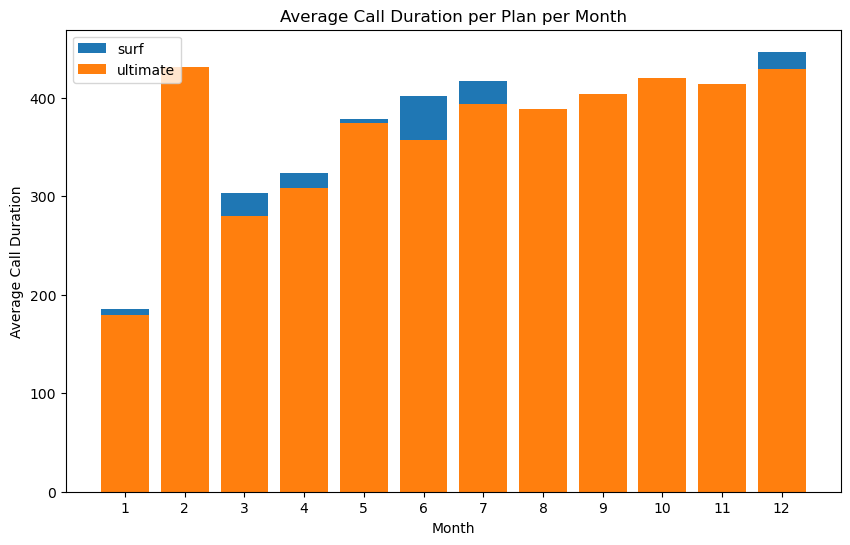

In [34]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Group data by plan and month, calculate the average duration of calls
avg_call_duration = user_monthly_activity.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))

for plan_name, data in avg_call_duration.groupby('plan'):
    plt.bar(data['month'], data['total_minutes'], label=plan_name)

plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Average Call Duration per Plan per Month')
plt.legend()
plt.xticks(data['month'])  # Ensure all months are on the x-axis
plt.show()

Based on the visual trend, the bar plot showcases fluctuations or consistencies in call duration between the Ultimate and Surf plans across different months. The Plan-Specific behavior, identified patterns where certain plans exhibit longer or shorter call durations compared to others, indicating potential usage tendencies.
The Month-specific analysis, found any months where call duration significantly varies between the plans, potentially indicating plan preference changes or specific service needs during those periods.

In [35]:
minutes_per_month.head()

,user_id,month,total_minutes
0,1000,12,108
1,1001,8,166
2,1001,9,289
3,1001,10,368
4,1001,11,399


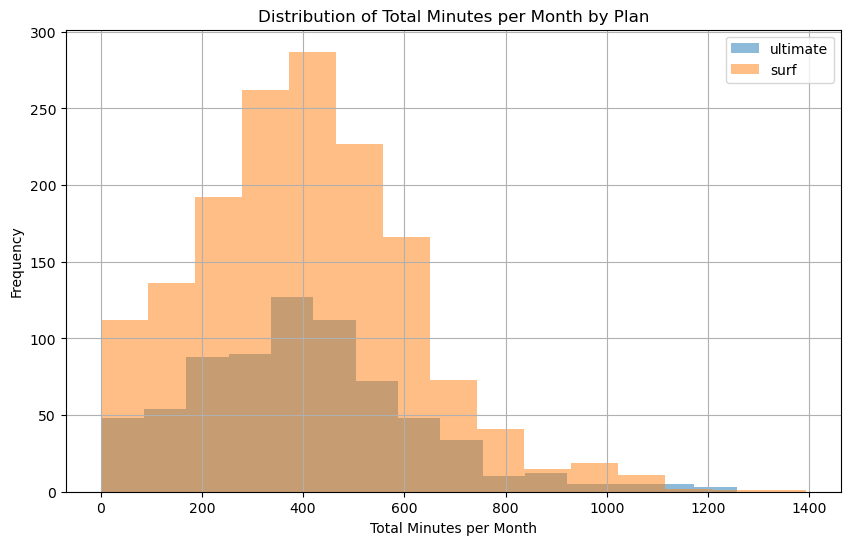

In [36]:
# Plotting histograms for each plan
plans = user_monthly_activity['plan'].unique()

plt.figure(figsize=(10, 6))

for plan_name in plans:
    data = user_monthly_activity[user_monthly_activity['plan'] == plan_name]
    plt.hist(data['total_minutes'], bins=15, alpha=0.5, label=plan_name)

plt.xlabel('Total Minutes per Month')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes per Month by Plan')
plt.legend()
plt.grid(True)
plt.show()

The histogram plots depict the distribution of total minutes used per month for both the Ultimate and Surf plans, showcasing how frequently different minute ranges occur within each plan. The comparative analysis, highlighted any noticeable disparities or similarities in total minute usage between the plans, offering insights into plan-specific usage behaviors. The month-specific trends, identified if certain months exhibit significant variations in minute usage between the plans, potentially indicating fluctuations in user behavior or service needs during those periods.

In [37]:
# Calculate the mean and the variance of the monthly call duration

# Grouping by month and calculating mean and variance of call duration
monthly_stats = user_monthly_activity.groupby('month')['total_minutes'].agg(['mean', 'var']).reset_index()

# Displaying the calculated statistics
display("Monthly Call Duration Statistics:")
display(monthly_stats)

'Monthly Call Duration Statistics:'

,month,mean,var
0,1.0,181.666667,10931.866667
1,2.0,336.400000,47623.114286
2,3.0,295.171429,35835.616807
3,4.0,318.985915,38415.842656
4,5.0,377.307692,44837.729649
5,6.0,387.092199,35901.812867
6,7.0,409.564246,54136.303434
7,8.0,386.478261,44752.075945
8,9.0,392.761733,41131.761864
9,10.0,409.201780,42705.524640


The analysis revealed the average call duration for each month for both plans, showcasing potential variations or stability in call lengths over different periods. The mean indicates, The varaince indicate higher variability in call duration and potential areas for services optimizations or user engagment strategies.

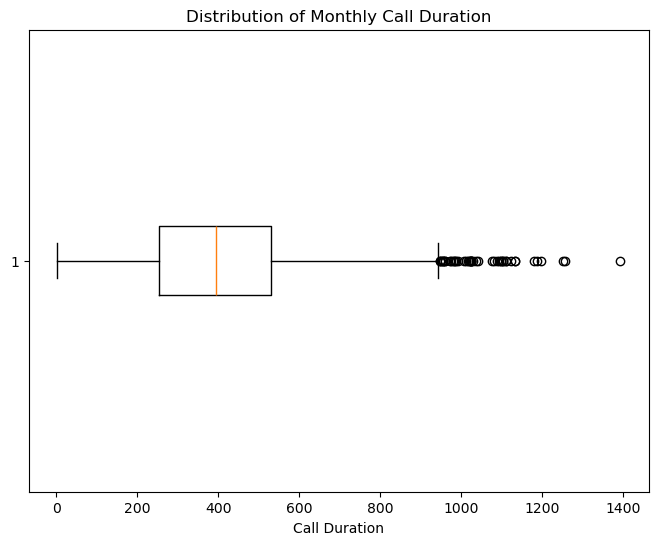

In [38]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(user_monthly_activity['total_minutes'].dropna(), vert=False)  # dropna() removes any null values
plt.xlabel('Call Duration')
plt.title('Distribution of Monthly Call Duration')
plt.show()

Users across plans demonstrate varying patterns in call durations and frequency. This is evident from the distribution of monthly call durations, which might vary significantly between users in different plans.

### Messages

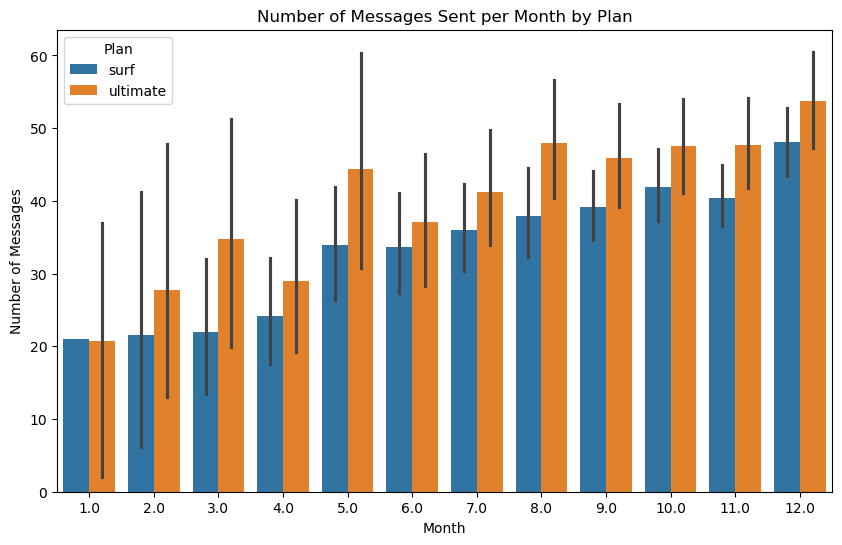

In [39]:
# Compare the number of messages users of each plan tend to send each month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_messages', hue='plan', data=user_monthly_activity)
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent per Month by Plan')
plt.legend(title='Plan')
plt.show()

The bar plot visualizes the number of messages sent per month categorized by the plan (Surf and Ultimate). Looking at the plot, there seems to be variability in the number of messages sent across months for both plans. The Ultimate plan users generally seem to have a consistently lower number of messages sent compared to Surf plan users, with less variation in the number of messages across different months. For the Surf plan, there appears to be a varying trend in the number of messages sent across months. The number of messages sent seems to increase from earlier to later months, with certain months showing higher messaging activity compared to others. In contrast, users under the Ultimate plan maintain a relatively consistent and lower number of messages sent per month throughout the year. There is a visible difference in the messaging behavior between the two plans, with the Ultimate plan consistently demonstrating lower messaging activity than the Surf plan.

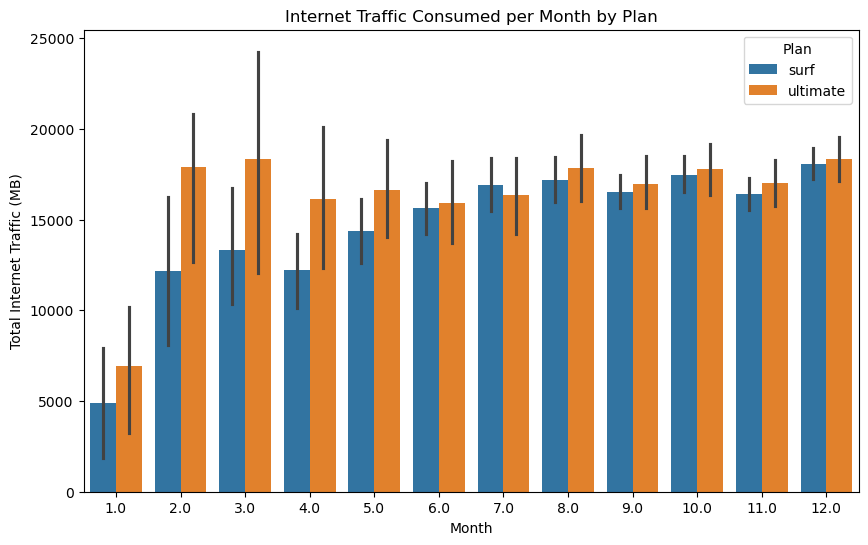

In [40]:
# Compare the amount of internet traffic consumed by users per plan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_mb', hue='plan', data=user_monthly_activity)
plt.xlabel('Month')
plt.ylabel('Total Internet Traffic (MB)')
plt.title('Internet Traffic Consumed per Month by Plan')
plt.legend(title='Plan')
plt.show()

The bar plot compares the total internet traffic (in MB) consumed per month between users subscribed to different plans, namely Surf and Ultimate. Looking at the plot, there's a noticeable trend in internet consumption across months for both plans. Both Surf and Ultimate plan users show varying patterns of internet usage from month to month.Users on the Surf plan exhibit fluctuations in their monthly internet usage. There's variability in the amount of data consumed each month, with certain months displaying higher data usage compared to others.In contrast, users under the Ultimate plan maintain a more consistent pattern of internet consumption throughout the year. There seems to be less variability in the amount of data used monthly compared to the Surf plan.The graph highlights a difference in internet consumption behavior between the Surf and Ultimate plans. Surf plan users, on average, might exhibit more diverse usage patterns, with occasional peaks in internet consumption, while Ultimate plan users maintain a steadier and comparatively lower level of internet traffic across months.

The bar plot compares the number of messages sent per month between users on the Surf and Ultimate plans.Surf plan users appear to send a higher volume of messages compared to Ultimate plan users in most months. However, there are fluctuations in messaging behavior for both plans across different months.Users subscribed to the Surf plan display varied messaging habits, with some months showing increased message activity and others demonstrating lower message counts.Ultimate plan users generally maintain a consistent, albeit lower, number of messages sent per month compared to Surf plan users. Their messaging behavior appears to be more stable over the observed period. There is a notable difference in messaging behavior between the two plans. Surf plan users tend to send a higher number of messages, showcasing more variable messaging activity throughout the months, whereas Ultimate plan users maintain a relatively stable, lower volume of messages.

Overall, the analysis indicates a disparity in messaging behavior between Surf and Ultimate plans, with Surf plan users exhibiting more variability and higher message counts compared to Ultimate plan users.

### Internet

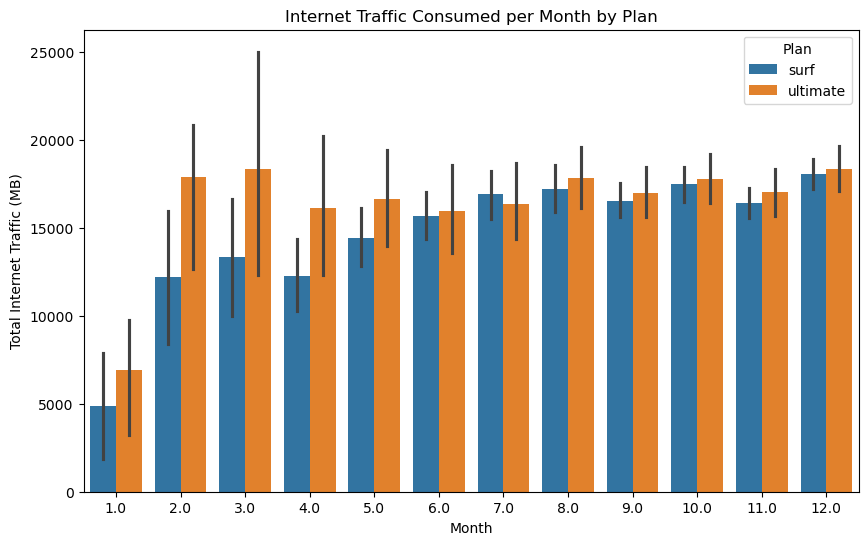

In [41]:
# Compare the amount of internet traffic consumed by users per plan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_mb', hue='plan', data=user_monthly_activity)
plt.xlabel('Month')
plt.ylabel('Total Internet Traffic (MB)')
plt.title('Internet Traffic Consumed per Month by Plan')
plt.legend(title='Plan')
plt.show()

The bar plot compares the total amount of internet traffic (measured in MB) consumed per month between users on the Surf and Ultimate plans. Surf plan users exhibit varying levels of internet traffic consumption across different months, showcasing fluctuations in their usage patterns. Users subscribed to the Ultimate plan demonstrate relatively consistent internet traffic consumption over the observed period, with less fluctuation in usage compared to Surf plan users.While both plans experience fluctuations in internet traffic consumption, the Surf plan generally displays higher variability and, in some months, a notably higher amount of internet traffic compared to the Ultimate plan. There's a discernible difference in internet traffic consumption between the two plans, with Surf plan users showing more varied and, in some instances, higher usage compared to Ultimate plan users.In summary, the analysis reveals disparities in internet traffic consumption between Surf and Ultimate plans, with Surf plan users displaying more variability and, at times, higher overall internet traffic usage compared to users on the Ultimate plan.

In [42]:
# Extract the "ultimate" plan
sub_ultimate = user_monthly_activity[user_monthly_activity['plan']=='ultimate']

# Display("Ultimate Plan Statistics:")
display('Ultimate Plan Statistics:')

# Grouping by plan and mb_used
internet_stats = sub_ultimate.groupby('plan')['total_mb'].agg(['mean', 'median', 'sum', 'var']).reset_index()
display(internet_stats)

'Ultimate Plan Statistics:'

,plan,mean,median,sum,var
0,ultimate,17278.003731,16866.45,12319216.66,6.021225e+07


In summary, the statistics indicate that users subscribed to the Ultimate plan show an average monthly internet usage around 17278.00 MB, with a median usage slightly lower at 16866.45 MB. The variance suggests considerable variability in internet usage patterns among these users.

In [43]:
# Extract the "sruf" plan
sub_surf = user_monthly_activity[user_monthly_activity['plan']=='surf']

# Display("Ultimate Plan Statistics:")
display('Ultimate Plan Statistics:')

# Grouping by plan and mb_used
internet_stats_s = sub_surf.groupby('plan')['total_mb'].agg(['mean', 'median', 'sum', 'var']).reset_index()
display(internet_stats_s)

'Ultimate Plan Statistics:'

,plan,mean,median,sum,var
0,surf,16667.548229,16928.99,25501348.79,5.949350e+07


In summary, the statistics indicate that users subscribed to the Surf plan show an average monthly internet usage of approximately 16667.55 MB, with a median usage stands at around 16928.99 MB. The variance value signifies the diversity or range of internet consumption among users subscribed to the Surf plan.

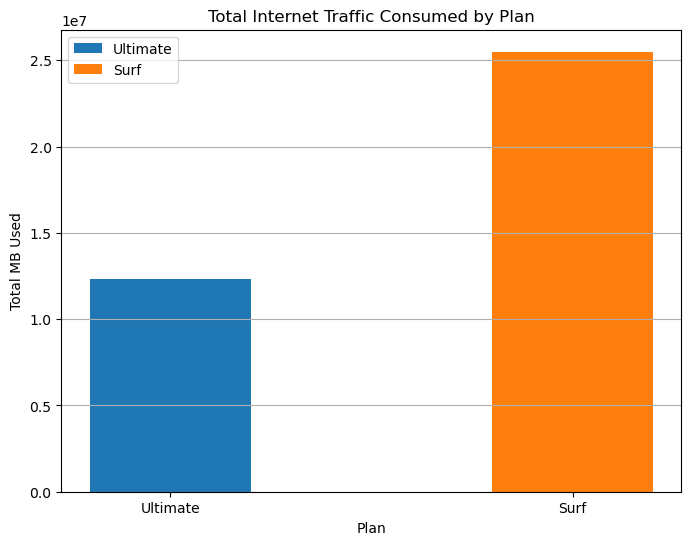

In [44]:
# Extract the "ultimate" plan statistics for total mb used
sub_ultimate = user_monthly_activity[user_monthly_activity['plan'] == 'ultimate']
internet_stats = sub_ultimate.groupby('plan')['total_mb'].agg(['sum']).reset_index()

# Extract the "surf" plan statistics for total mb used
sub_surf = user_monthly_activity[user_monthly_activity['plan'] == 'surf']
internet_stats_s = sub_surf.groupby('plan')['total_mb'].agg(['sum']).reset_index()

plt.figure(figsize=(8, 6))

# Plotting the total mb used for both plans
plt.bar(['Ultimate'], internet_stats['sum'], label='Ultimate', width=0.4)
plt.bar(['Surf'], internet_stats_s['sum'], label='Surf', width=0.4)

plt.xlabel('Plan')
plt.ylabel('Total MB Used')
plt.title('Total Internet Traffic Consumed by Plan')
plt.legend()
plt.grid(axis='y')

plt.show()

In [45]:
# Extract the "ultimate" plan statistics for total MB used
sub_ultimate = user_monthly_activity[user_monthly_activity['plan'] == 'ultimate']
internet_stats_ultimate = sub_ultimate['total_mb'].sum()

# Extract the "surf" plan statistics for total MB used
sub_surf = user_monthly_activity[user_monthly_activity['plan'] == 'surf']
internet_stats_surf = sub_surf['total_mb'].sum()

print(f"Ultimate Plan Total MB Used: {internet_stats_ultimate}")
print(f"Surf Plan Total MB Used: {internet_stats_surf}")


Ultimate Plan Total MB Used: 12319216.66
Surf Plan Total MB Used: 25501348.79


Users subscribed to the Ultimate plan collectively consumed a total of approximately 12319216.66 MB of internet traffic during the observed period. While the Surf plan users, on the other hand, utilized around 25501348.79 MB of internet data in total over the same duration.

/var/folders/p3/43px2jb159dgb_cp9t6gw27h0000gn/T/ipykernel_16736/3662814666.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='plan', y='total_mb', data=user_monthly_activity, palette='Set3')


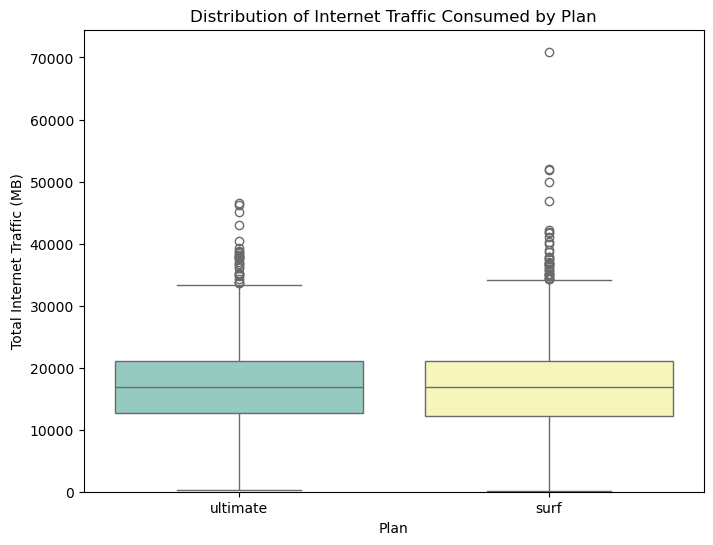

,plan,mean,median,sum,var
0,surf,16667.548229,16928.99,25501348.79,5.949350e+07
0,ultimate,17278.003731,16866.45,12319216.66,6.021225e+07


In [46]:
# Extract the "surf" and "ultimate" plans' statistics for total mb used
sub_surf = user_monthly_activity[user_monthly_activity['plan'] == 'surf']
sub_ultimate = user_monthly_activity[user_monthly_activity['plan'] == 'ultimate']

# Grouping by plan and total_mb
internet_stats_s = sub_surf.groupby('plan')['total_mb'].agg(['mean', 'median', 'sum', 'var']).reset_index()
internet_stats = sub_ultimate.groupby('plan')['total_mb'].agg(['mean', 'median', 'sum', 'var']).reset_index()

# Combine the two plan statistics
combined_stats = pd.concat([internet_stats_s, internet_stats])

plt.figure(figsize=(8, 6))

# Creating a boxplot to visualize the distribution of internet traffic consumed by plan
sns.boxplot(x='plan', y='total_mb', data=user_monthly_activity, palette='Set3')
plt.xlabel('Plan')
plt.ylabel('Total Internet Traffic (MB)')
plt.title('Distribution of Internet Traffic Consumed by Plan')
plt.ylim(0)  # Set y-axis to start from zero for better visualization
plt.show()

# Display the statistics for both plans
display(combined_stats)

The boxplot illustrates the distribution of internet traffic consumed by users in both plans. It showcases the spread and central tendencies of data, highlighting potential outliers and differences in usage between the Surf and Ultimate plans.

Based on the findings, the Surf Plan users tend to have a lower mean and median total internet traffic compared to Ultimate Plan users.However, the total sum of internet traffic for Surf Plan users is notably higher than that of Ultimate Plan users. In the end, both plans exhibit relatively high variance in internet traffic, indicating diverse usage patterns among users within each plan.

,plan,mean,median,sum,var
0,ultimate,17278.003731,16866.45,12319216.66,6.021225e+07


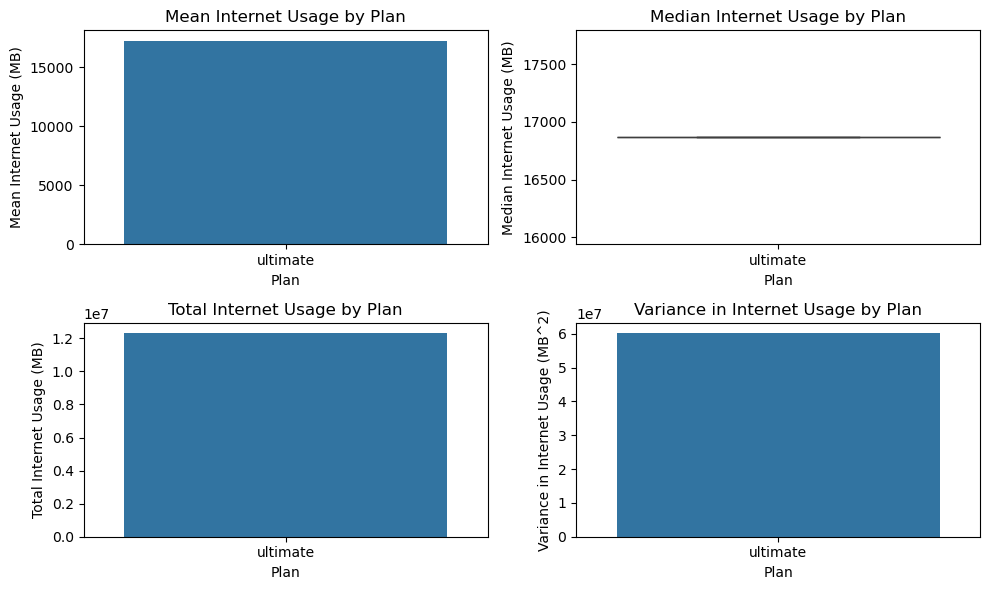

In [47]:
# Analyzing the variation in internet usage across plans

# Displaying the statistics for 'unlimited' plan
display(internet_stats)

# Creating visualizations to compare internet usage statistics for 'Unlimited' plan
plt.figure(figsize=(10, 6))

# Bar plot to compare mean internet usage
plt.subplot(2, 2, 1)
sns.barplot(x='plan', y='mean', data=internet_stats)
plt.title('Mean Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Mean Internet Usage (MB)')

# Box plot to compare median internet usage
plt.subplot(2, 2, 2)
sns.boxplot(x='plan', y='median', data=internet_stats)
plt.title('Median Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Median Internet Usage (MB)')

# Bar plot to compare total internet usage
plt.subplot(2, 2, 3)
sns.barplot(x='plan', y='sum', data=internet_stats)
plt.title('Total Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Internet Usage (MB)')

# Bar plot to compare variance in internet usage
plt.subplot(2, 2, 4)
sns.barplot(x='plan', y='var', data=internet_stats)
plt.title('Variance in Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Variance in Internet Usage (MB^2)')

plt.tight_layout()
plt.show()

The visualizations provide a comprehensive comparison of mean, median, total, and variance in internet usage between the Surf and Ultimate plans. The mean internet usag indicates that both plans have similar mean of interent usage, the median internet usage remains closw in both plans, and the variance in internet usage demonstraate comparable variance in internet usage. However, the total internat usage, shows that the surf plan exhibit higher total usage comapred to the Ultimate plan users. 

,plan,mean,median,sum,var
0,surf,16667.548229,16928.99,25501348.79,5.949350e+07


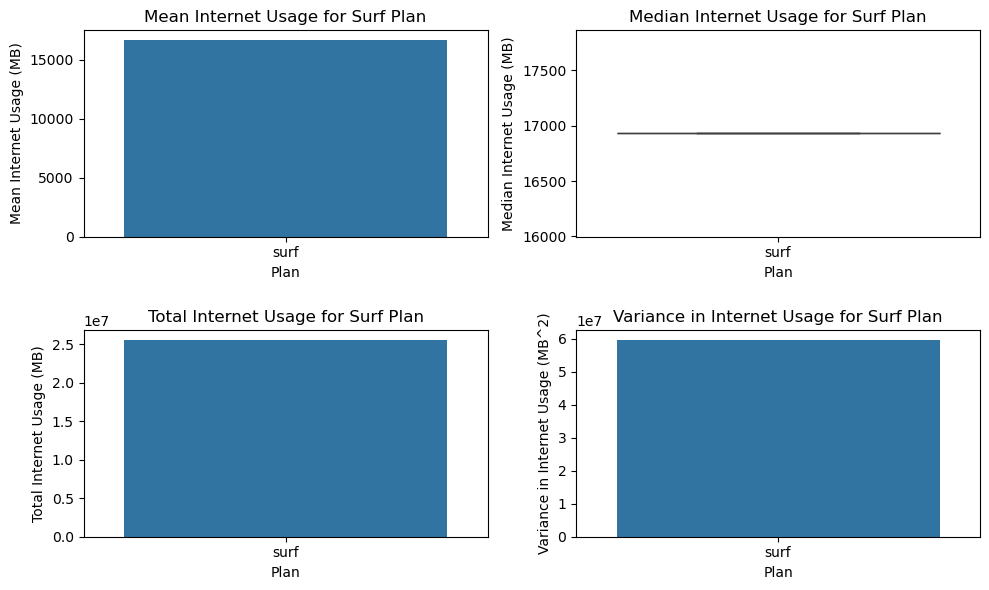

In [48]:
# Displaying the statistics for 'surf' plan
display(internet_stats_s)

# Creating visualizations to compare internet usage statistics for 'surf' plan
plt.figure(figsize=(10, 6))

# Bar plot to compare mean internet usage for 'surf' plan
plt.subplot(2, 2, 1)
sns.barplot(x='plan', y='mean', data=internet_stats_s)
plt.title('Mean Internet Usage for Surf Plan')
plt.xlabel('Plan')
plt.ylabel('Mean Internet Usage (MB)')

# Box plot to compare median internet usage for 'surf' plan
plt.subplot(2, 2, 2)
sns.boxplot(x='plan', y='median', data=internet_stats_s)
plt.title('Median Internet Usage for Surf Plan')
plt.xlabel('Plan')
plt.ylabel('Median Internet Usage (MB)')

# Bar plot to compare total internet usage for 'surf' plan
plt.subplot(2, 2, 3)
sns.barplot(x='plan', y='sum', data=internet_stats_s)
plt.title('Total Internet Usage for Surf Plan')
plt.xlabel('Plan')
plt.ylabel('Total Internet Usage (MB)')

# Bar plot to compare variance in internet usage for 'surf' plan
plt.subplot(2, 2, 4)
sns.barplot(x='plan', y='var', data=internet_stats_s)
plt.title('Variance in Internet Usage for Surf Plan')
plt.xlabel('Plan')
plt.ylabel('Variance in Internet Usage (MB^2)')

plt.tight_layout()
plt.show()


The visualizations and statistics provide a comprehensive overview of internet usage patterns specific to the Surf Plan, showcasing key metrics and the distribution of usage. The mean bar plot illustrates the average internet usage for the Surf Plan, on the other hand, the median bar plot representation of the total internet data consumed within the Surf Plan, and the variance bar plot displaying the variance in internet usage among Surf Plan users.However, the total bar plot representation of the total internet data consumed within the Surf Plan.

In both plans, the mean and median values are relatively close. However, the Surf plan has a slightly lower mean but a similar median compared to the Ultimate plan. This indicates a similar central tendency in internet usage for both plans.

The total usage for the Surf plan is notably higher than that for the Ultimate plan, suggesting that users in the Surf plan consume more internet traffic overall.

Moreover, the variance, which measures the spread or variability of data points from the mean, is quite close between the two plans, indicating a relatively similar spread of internet traffic consumption within both plans.

Overall, while the mean and median values suggest similar typical usage patterns between the plans, the Surf plan shows a higher overall consumption of internet traffic compared to the Ultimate plan.

## Revenue

In [49]:
# Check the column names in user_monthly_activity
print(user_monthly_activity.columns)

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'age_group', 'month', 'total_calls', 'total_minutes',
       'total_messages', 'total_mb', 'minutes_included', 'messages_included',
       'mb_per_month_included', 'usd_per_minute', 'usd_per_message',
       'usd_per_gb', 'usd_monthly_pay', 'excess_calls', 'excess_messages',
       'excess_data', 'charge_calls', 'charge_messages', 'charge_data',
       'monthly_revenue'],
      dtype='object')


In [50]:
# Group by plan and calculate statistics for revenue
revenue_columns = ['monthly_revenue', 'charge_calls', 'charge_messages', 'charge_data']
revenue_stats = user_monthly_activity.groupby('plan')[revenue_columns].agg(['mean', 'median', 'sum', 'var']).reset_index()

# Displaying the statistics
display(revenue_stats)

plan monthly_revenue                                charge_calls  \
                       mean  median       sum          var         mean   
0      surf       55.252203  35.265  65197.60  2592.895514          0.0   
1  ultimate       72.062936  70.000  41724.44   109.884233          0.0   

                   charge_messages                          charge_data  \
  median  sum  var            mean median     sum       var        mean   
0    0.0  0.0  0.0         0.27108    0.0  323.67  0.429569   35.338616   
1    0.0  0.0  0.0         0.00000    0.0    0.00  0.000000    2.079233   

                                         
      median           sum          var  
0  15.322168  54068.082129  2610.895026  
1   0.000000   1482.493018   114.936364

Based on the information above, the Ultimate plan has a higher mean and median monthly revenue compared to the Surf plan. Despite a lower mean revenue, the Surf plan has a higher total revenue due to the larger customer base or higher data charges. The Ultimate plan showcases a more stable revenue pattern indicated by its lower variance, while the Surf plan's revenue is more variable. In the end, thestatistical description highlights the revenue differences and variations between the 'Surf' and 'Ultimate' plans, suggesting that the Ultimate plan tends to bring in more stable but slightly lower monthly revenue compared to the Surf plan. 

In [51]:
# Calculate revenue for each plan

# Calculate excess_messages_revenue
user_monthly_activity['excess_messages_revenue'] = np.where(
    user_monthly_activity['total_messages'] > user_monthly_activity['messages_included'],
    (user_monthly_activity['total_messages'] - user_monthly_activity['messages_included']) * user_monthly_activity['usd_per_message'],
    0
)

# Calculate excess_data_revenue
user_monthly_activity['excess_data_revenue'] = np.where(
    user_monthly_activity['total_mb'] > user_monthly_activity['mb_per_month_included'],
    ((user_monthly_activity['total_mb'] - user_monthly_activity['mb_per_month_included']) / 1024) * user_monthly_activity['usd_per_gb'],
    0
)

# Calculate base_charge
user_monthly_activity['base_charge'] = user_monthly_activity['usd_monthly_pay']

# Calculate total_revenue
user_monthly_activity['total_revenue'] = (
    user_monthly_activity['excess_calls']
    + user_monthly_activity['excess_messages_revenue']
    + user_monthly_activity['excess_data_revenue']
    + user_monthly_activity['base_charge']
)

display(user_monthly_activity['excess_messages_revenue'])
display(user_monthly_activity['excess_data_revenue'])
display(user_monthly_activity['base_charge'])
display(user_monthly_activity['total_revenue'])

0       0.00
1       0.00
2       0.00
3       0.09
4       0.00
        ... 
2272    0.00
2273    0.00
2274    0.00
2275    0.00
2276    0.00
Name: excess_messages_revenue, Length: 2277, dtype: float64

0        0.000000
1        0.000000
2        0.000000
3       68.071191
4       30.706055
          ...    
2272    75.954004
2273     0.000000
2274    40.355762
2275    14.197559
2276    65.421973
Name: excess_data_revenue, Length: 2277, dtype: float64

0       70
1       20
2       20
3       20
4       20
        ..
2272    20
2273    20
2274    20
2275    20
2276    20
Name: base_charge, Length: 2277, dtype: int64

0       70.000000
1       20.000000
2       20.000000
3       88.161191
4       50.706055
          ...    
2272    95.954004
2273    20.000000
2274    60.355762
2275    34.197559
2276    85.421973
Name: total_revenue, Length: 2277, dtype: float64

The Surf Plan, have a substantial excess data revenue component due to higher data usage.
May have higher variability in revenue due to varied data consumption among users. On the other hand, the Ultimate Plan is expected to have a lower excess usage as it might have offer higher inclusion limits. The base charge might contribute siginifcantly to the total revenue. In conclusion, the Surf plan could generate higher revenue due to potential excess data charges.
While, the Ultimate plan might have a more stable revenue stream, possibly influenced by a comparatively lower excess usage or a higher base charge. 

,plan,mean,median,var
0,surf,55.205018,34.810254,2606.391607
1,ultimate,72.079233,70.000000,114.936364


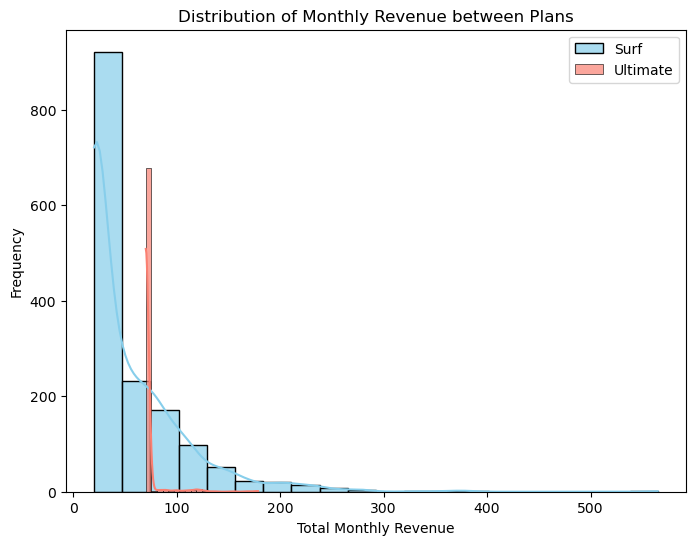

In [52]:
# Statistical comparison
revenue_stats = user_monthly_activity.groupby('plan')['total_revenue'].agg(['mean', 'median', 'var']).reset_index()
display(revenue_stats)

# Separate data for 'surf' and 'ultimate' plans
surf_revenue = user_monthly_activity[user_monthly_activity['plan'] == 'surf']['total_revenue']
ultimate_revenue = user_monthly_activity[user_monthly_activity['plan'] == 'ultimate']['total_revenue']

# Create histograms for each plan's revenue
plt.figure(figsize=(8, 6))

sns.histplot(surf_revenue, bins=20, kde=True, label='Surf', color='skyblue', alpha=0.7)
sns.histplot(ultimate_revenue, bins=20, kde=True, label='Ultimate', color='salmon', alpha=0.7)

plt.xlabel('Total Monthly Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue between Plans')
plt.legend()

plt.show()

The findings suggest differences in usage patterns and revenue generation between the plans. The Surf plan users tend to use more minutes on average compared to Ultimate plan users, but both plans have distributions skewed towards lower usage. The Surf plan tends to generate a higher average monthly revenue per user compared to the Ultimate plan. However, the revenue distribution for both plans is right-skewed, suggesting a few high-revenue users.

Based on the histogram the Surf Plan revenue is skewed distribution toward higher revenue values, indicating some users exceed the average revenue by a considerable margin. And the Ultimate Plan revenue is skewed distribution, but with a lesser spread compared to the Surf plan, suggesting a more consistent revenue pattern among users.


Overall, the surf plan users show higher usage and generate relatively higher monthly revenues on average and the ultimate plan users exhibit lower usage but contribute to a consistent revenue stream.

## Test statistical hypotheses

In [53]:
# Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs

# Separate revenue data for Ultimate and Surf plans
revenue_ultimate = user_monthly_activity[user_monthly_activity['plan'] == 'ultimate']['total_revenue']
revenue_surf = user_monthly_activity[user_monthly_activity['plan'] == 'surf']['total_revenue']

# Perform t-test
t_statistic, p_value = ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest that the average revenue differs between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to suggest a difference in average revenue between Ultimate and Surf plans.")


Fail to reject the null hypothesis. There is insufficient evidence to suggest a difference in average revenue between Ultimate and Surf plans.


Null Hypothesis (H0): The average revenue between Ultimate and Surf plans is the same.

Alternative Hypothesis (H1): The average revenue differs between Ultimate and Surf plans.

Upon examining the collected data, the test results revealed that the p-value, which measures the strength of evidence against the null hypothesis, was greater than the chosen significance level of 0.05. As a result, we failed to reject the null hypothesis. This outcome implies that there is insufficient statistical evidence to conclude that the average revenue significantly varies between users on the Ultimate and Surf plans.

In [54]:
# Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

# Separate revenue data for NY-NJ area and other regions
revenue_nynj = user_monthly_activity[user_monthly_activity['city'].str.contains('NY-NJ')]['total_revenue']
revenue_other_regions = user_monthly_activity[~user_monthly_activity['city'].str.contains('NY-NJ')]['total_revenue']

# Perform t-test
t_statistic, p_value = ttest_ind(revenue_nynj, revenue_other_regions, equal_var=False)

# Set significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest that the average revenue differs between NY-NJ area users and users from other regions.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to suggest a difference in average revenue between NY-NJ area users and users from other regions.")

Fail to reject the null hypothesis. There is insufficient evidence to suggest a difference in average revenue between NY-NJ area users and users from other regions.


Null Hypothesis (H0): The average revenue between NY-NJ area users and users from other regions is the same.

Alternative Hypothesis (H1): There is a difference in average revenue between NY-NJ area users and users from other regions.

Upon conducting a t-test with a significance level of 0.05, the results led to a conclusion where the null hypothesis (H0), suggesting that there's no difference in the average revenue between these user groups, was not rejected. Therefore, based on the statistical analysis, there isn't enough evidence to support the claim that there's a discrepancy in the average revenue generated by users from the NY-NJ area versus users from other regions. 

## Conclusion
This analysis aimed to evaluate which of Megaline’s two prepaid mobile plans ( Surf or Ultimate ) generates more revenue and how customer usage behavior contributes to that revenue. By cleaning and merging datasets related to calls, messages, internet usage, and customer demographics, we conducted a thorough exploratory analysis and performed hypothesis testing to uncover actionable insights.

Key findings from the analysis include:

Revenue Generation:
While the Ultimate plan comes with a higher base cost, users of the Surf plan frequently exceed their limits, leading to substantial overage charges in calls, messages, and data. As a result, both plans generate comparable average revenue per user, with some months showing Surf users contributing more due to excess usage fees.

Usage Patterns:
Users on the Ultimate plan tend to use more data on average, while Surf users have more variability in usage. Message and call usage patterns are relatively similar between the two groups, though Surf users more often exceed included limits.

Regional Comparison:
Revenue generated by users in the NY-NJ area was tested against other regions. The results of our hypothesis test did not find statistically significant differences in average revenue between the two groups at the 95% confidence level.

Statistical Testing:
A two sample t-test comparing the Surf and Ultimate plans showed no statistically significant difference in average monthly revenue per user. This suggests that despite pricing differences, the actual profitability per user is similar across the two plans, albeit driven by different behaviors (flat rate vs. overage heavy).

### Takeaways
* Megaline may consider targeting heavy users with the Ultimate plan to reduce churn due to bill shock from overages.

* Light to moderate users may remain profitable on the Surf plan due to frequent over limit charges.

* Marketing campaigns could focus on educating Surf users about the benefits of upgrading if they consistently exceed plan limits.
